Raul Jimenez - 19017

Bryann Alfaro - 19372

Donaldo Garcia - 19683

In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Preprocesamiento

1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a
estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan
pocas observaciones.

In [ ]:
# crea un dataframe a partir de las carpetas dentro de "malimg_dataset" y sus archivos .bytes
df = pd.DataFrame(columns=['Family', 'Image'])
fam_cat = {}
for i, family in enumerate(os.listdir('malimg_dataset')):
    fam_cat[i] = family
    for image in os.listdir(f'malimg_dataset/{family}'):
        imagen = Image.open(f'malimg_dataset/{family}/{image}')
        imagen = imagen.resize((50,50))
        df = df.append({'Family': family, 'Name': image, 'Family_cat': i ,'Image': np.array(imagen).tolist()}, ignore_index=True)
# for family in os.listdir('malimg_dataset'):
#     for image in os.listdir(f'malimg_dataset/{family}'):
#         imagen = Image.open(f'malimg_dataset/{family}/{image}')
#         imagen = imagen.resize((50,50))
#         #make the array of the image with 50x50 without numpy
#         #df = df.append({'Family': family, 'Name': image, 'Image': imagen}, ignore_index=True)
#         df = df.append({'Family': family, 'Name': image, 'Image': np.array(imagen).tolist()}, ignore_index=True)
#         #make the array of the image with 50x50
        

# muestra las primeras 5 filas del dataframe
df.head()

In [3]:
df.value_counts('Family')

Family
Allaple.A         2949
Allaple.L         1591
Yuner.A            800
Instantaccess      431
VB.AT              408
Fakerean           381
Lolyda.AA1         213
C2LOP.gen!g        200
Alueron.gen!J      198
Lolyda.AA2         184
Dialplatform.B     177
Dontovo.A          162
Lolyda.AT          159
Rbot!gen           158
C2LOP.P            146
Obfuscator.AD      142
Malex.gen!J        136
Swizzor.gen!I      132
Swizzor.gen!E      128
Lolyda.AA3         123
Adialer.C          122
Agent.FYI          116
Autorun.K          106
Wintrim.BX          97
Skintrim.N          80
dtype: int64

En este caso como hay muy pocos datos vamos a trabajar unicamente con las familias que tienen al menos 150 observaciones.

In [4]:
# removemos las familias con menos de 150 muestras del dataset
df = df[df['Family'].isin(df['Family'].value_counts()[df['Family'].value_counts() > 150].index)]
df.value_counts('Family')

Family
Allaple.A         2949
Allaple.L         1591
Yuner.A            800
Instantaccess      431
VB.AT              408
Fakerean           381
Lolyda.AA1         213
C2LOP.gen!g        200
Alueron.gen!J      198
Lolyda.AA2         184
Dialplatform.B     177
Dontovo.A          162
Lolyda.AT          159
Rbot!gen           158
dtype: int64

2. Plotee las imágenes de los ejemplos de malware.

In [ ]:
# mostramos las imagenes de cada familia con plt.imshow
for family in df['Family'].unique():
    plt.figure(figsize=(10, 10))
    plt.suptitle(family, fontsize=16)
    for i, image in enumerate(df[df['Family'] == family]['Image'].values[:5]):
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


Utilizando Keras y Tensorflow construya una red neuronal con las capas, funciones de
activación y el optimizador que considere conveniente.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
modelo_lab = Sequential()

In [28]:
modelo_lab.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (50, 50, 1), activation = 'relu'))

In [29]:
modelo_lab.add(MaxPool2D(pool_size = (2, 2)))

In [30]:
modelo_lab.add(Flatten())

In [31]:
modelo_lab.add(Dense(128, activation = 'relu'))

In [32]:
modelo_lab.add(Dense(25, activation = 'softmax'))

In [33]:
#Compilacion
modelo_lab.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

Resumen del modelo

In [34]:
modelo_lab.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2166912   
                                                                 
 dense_3 (Dense)             (None, 25)                3225      
                                                                 
Total params: 2,170,681
Trainable params: 2,170,681
Non-trainable params: 0
____________________________________________

Divida el dataset en un 70% entrenamiento y un 30% de pruebas

In [15]:
df.head()

,Family,Image,Family_cat,Name
238,Allaple.A,"[[40, 36, 46, 42, 29, 38, 43, 36, 41, 28, 29, ...",2.0,00000d3e89aa9d228251616ae7a6ab06.png
239,Allaple.A,"[[61, 47, 65, 52, 53, 46, 37, 28, 33, 40, 41, ...",2.0,000012cb3104b542b482df95cd31cec2.png
240,Allaple.A,"[[67, 56, 63, 52, 39, 47, 66, 52, 39, 63, 69, ...",2.0,00005470c58e40d3255c064f9db60b71.png
241,Allaple.A,"[[56, 45, 48, 41, 34, 34, 45, 22, 27, 34, 36, ...",2.0,00008667e5373ee6fea920c3b29cc892.png
242,Allaple.A,"[[42, 41, 50, 34, 37, 42, 54, 34, 32, 31, 34, ...",2.0,00009213feb3dc7b23821d749bb8c940.png


In [16]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
X = df['Image'].values
y = df['Family_cat'].values
#convert X to numpy array and inside with simple list
X = np.array([np.array(xi) for xi in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizar los datos
X_train


array([[[ 78,  54,  61, ...,  52,  69,  65],
        [115, 139, 118, ..., 141, 142, 121],
        [119, 113, 128, ..., 123, 106, 113],
        ...,
        [125, 127, 120, ..., 125, 117, 113],
        [120, 127, 120, ..., 129, 131, 132],
        [113, 109, 108, ..., 100, 105, 103]],

       [[ 60,  59,  67, ...,  44,  54,  57],
        [116, 141, 144, ..., 114, 115, 121],
        [135, 120, 127, ..., 121,  97, 113],
        ...,
        [118, 127, 140, ..., 107, 113, 135],
        [135, 114, 123, ..., 137, 124, 122],
        [122, 134, 141, ..., 120, 127, 132]],

       [[106,  87,  86, ..., 100,  93, 105],
        [128, 107, 119, ..., 124, 118, 119],
        [120, 105, 122, ..., 120,  89,  96],
        ...,
        [ 88,  69,  69, ...,  58,  91,  73],
        [ 74,  66,  62, ...,  66,  60,  40],
        [ 26,  41,  44, ...,  40,  31,  31]],

       ...,

       [[ 70,  55,  69, ...,  54,  79,  67],
        [127, 124, 128, ..., 110, 125, 148],
        [134,  98, 125, ..., 122, 116, 120

In [17]:
#Normalizar los datos
X_train = X_train/255
X_test = X_test/255


0.6705882352941176

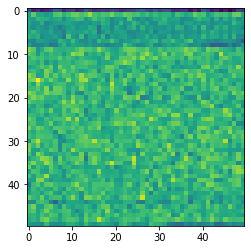

In [18]:
#Mostrar una imagen
plt.imshow(X_train[0])
#mostrar la normalizacion
X_train[0].max()


In [19]:
print(X_train.shape, X_test.shape)

(6408, 50, 50) (1603, 50, 50)


In [20]:
#Agregar una dimension a los datos 
X_train = X_train.reshape(6408, 50, 50, 1)
X_test = X_test.reshape(1603, 50, 50, 1)

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
print(y_train.shape, y_test.shape)

(6408,) (1603,)


In [23]:
categorical_y_entrenamiento = to_categorical(y_train, 25)
categorical_y_test = to_categorical(y_test, 25)

In [24]:
print(categorical_y_entrenamiento.shape, categorical_y_test.shape)

(6408, 25) (1603, 25)


Entrenamiento del modelo

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
modelo_lab.fit(X_train, categorical_y_entrenamiento, epochs = 15, validation_data = (X_test,categorical_y_test),callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2)])

Epoch 1/15
201/201 [==============================] - 16s 71ms/step - loss: 0.5881 - accuracy: 0.8241 - val_loss: 0.1438 - val_accuracy: 0.9676
Epoch 2/15
201/201 [==============================] - 13s 63ms/step - loss: 0.0671 - accuracy: 0.9849 - val_loss: 0.0296 - val_accuracy: 0.9944
Epoch 3/15
201/201 [==============================] - 14s 69ms/step - loss: 0.0297 - accuracy: 0.9931 - val_loss: 0.0199 - val_accuracy: 0.9969
Epoch 4/15
201/201 [==============================] - 14s 68ms/step - loss: 0.0161 - accuracy: 0.9964 - val_loss: 0.0142 - val_accuracy: 0.9975
Epoch 5/15
201/201 [==============================] - 13s 63ms/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 0.0156 - val_accuracy: 0.9975
Epoch 6/15
201/201 [==============================] - 11s 57ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0357 - val_accuracy: 0.9913


Metricas del modelo

Evalúe el modelo con el dataset de pruebas y muestre las métricas obtenidas. Discuta los
resultados obtenidos.